### Import libraries

In [2]:
import os
import numpy as np
import pandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1 from Tuesday class

In [3]:
# Import states data
fp = os.path.join('../','section-7','data','tl_2023_us_state','tl_2023_us_state.shp')
states = gpd.read_file(fp)

# Simplify column names 
states.columns = states.columns.str.lower()
ca_boundary = states.loc[states["name"] == "California"]

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


In [3]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude, 
                            power_plants.latitude)

# Create geodataframe
power_plants = gpd.GeoDataFrame(power_plants,    # Data
                                geometry=points, # Specify geometry column
                                crs='EPSG:4269'  # Specify CRS
                                )


ca_power_plants = power_plants[power_plants['state'] == 'California']
top_sources = ca_power_plants['primsource'].value_counts().head(3).index.tolist()
top_sources

['solar', 'natural gas', 'hydroelectric']

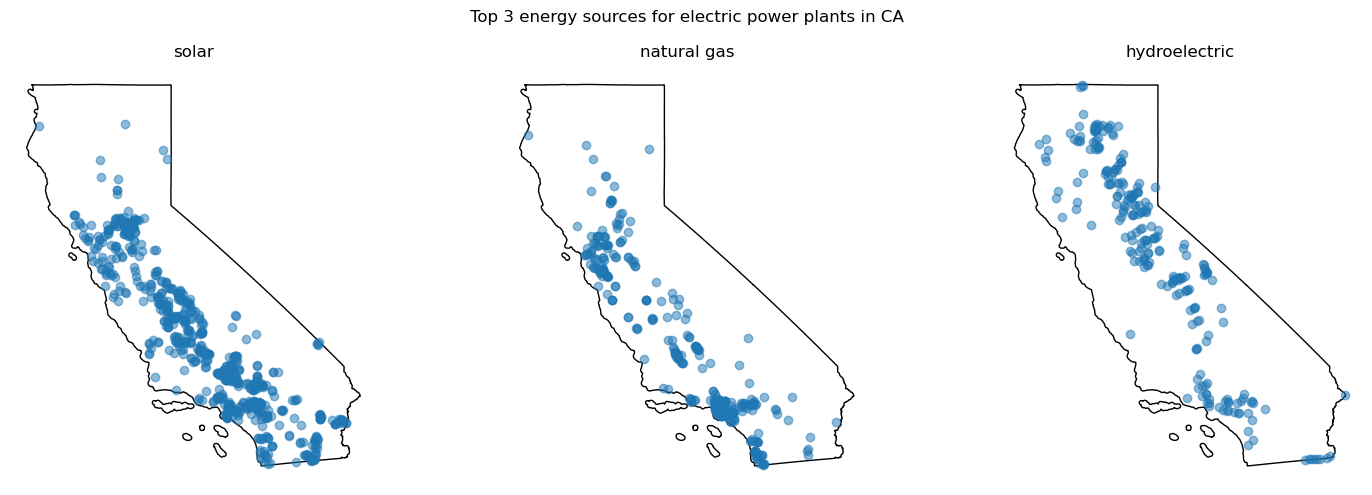

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle("Top 3 energy sources for electric power plants in CA")

for ax, source in zip(axes, top_sources):
    # Plot California boundary
    ca_boundary.plot(ax=ax,facecolor='none' , edgecolor = "black")
    
    # Filter and plot power plants for this source
    source_plants = ca_power_plants[ca_power_plants['primsource'] == source]
    source_plants.plot(ax=ax, alpha = 0.5)
    
    # Format the subplot
    ax.set_title(f'{source}', fontsize=12)
    ax.set_axis_off()
    
plt.tight_layout()
plt.show()

### Exercise #2 - Sofia

In [5]:
def top3_states(pwr_source, power_plants):
    pwr_plant_source = power_plants[power_plants['primsource'] == pwr_source]
    top_states = pwr_plant_source['state'].value_counts().index[:3].tolist()
    return top_states

In [13]:
top_states = top3_states('wind', power_plants)
top_states

['Texas', 'Minnesota', 'Iowa']

In [9]:
pwr_source_plants = power_plants[power_plants['primsource'] == 'wind']
pwr_source_plants

pwr_source_plants_state = pwr_source_plants[pwr_source_plants['state'] == 'Texas']

pwr_source_plants_state.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,...,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
3491,15061,54979,Big Spring Wind Power Facility,2770,Terra-Gen Operating Co-Wind,IPP Non-CHP,3300 South Moss Lake Rd,Big Spring,Howard,Texas,...,NaN,NaN,NaN,34.3,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.388333,32.2075,POINT (-101.38833 32.20750)
3811,15380,55579,Llano Estacado Wind Ranch,62136,Llano Estacado Wind Ranch,IPP Non-CHP,Unnammed road,White Deer,Carson,Texas,...,NaN,NaN,NaN,80.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.253300,35.4677,POINT (-101.25330 35.46770)
3812,15381,55581,King Mountain Wind Ranch 1,6354,FPL Energy Upton Wind LP,IPP Non-CHP,120 E. 5th Street,McCamey,Upton,Texas,...,NaN,NaN,NaN,278.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-102.241700,31.2092,POINT (-102.24170 31.20920)


In [19]:
def plot_top3_states(pwr_source, power_plants, states):

    fig, ax = plt.subplots(figsize=(12,6), nrows = 1, ncols=3)

    for axis, state in zip(ax, top_states):

        axis.set_title(state)
        axis.axis('off')

        # Extract the state boundary and plot
        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax = axis,
                           color='none')

        # Subset power plant info by power source

        pwr_source_plants = power_plants[power_plants['primsource'] == pwr_source]
        pwr_source_plants_state = pwr_source_plants[pwr_source_plants['state'] == state]

        # Plot power plant info
        pwr_source_plants_state.plot(ax=axis,
                                    markersize=5,
                                    alpha = 0.5)

    plt.suptitle(f"Top 3 U.S. states by number of {pwr_source}-powered electric plants")
    plt.show()

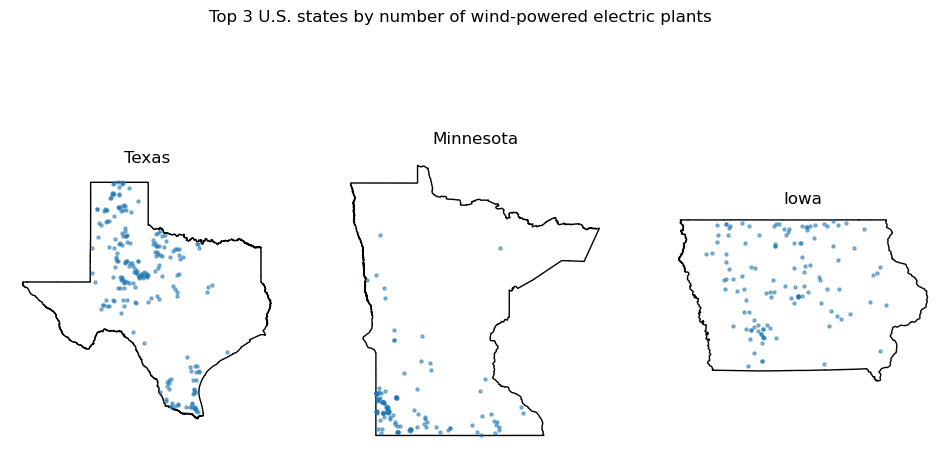

In [20]:
plot_top3_states('wind', power_plants, states)

### Import arctic communities data

<Axes: >

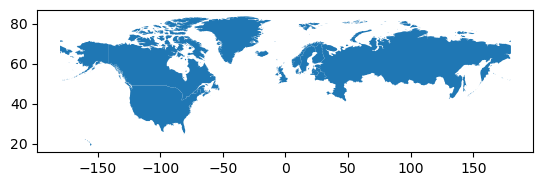

In [21]:
fp = os.path.join('../../../../../courses/EDS220/data/arctic_communities.geojson')
df = gpd.read_file(fp)
df.plot()

### Check Geometry type - Henry

In [28]:
#create a function named  check_polygons  that receives a single geodataframe as its parameter and prints out a message stating whether all the geometry types are polygons or not.
df.geom_type

admin
United States of America    MultiPolygon
United Kingdom              MultiPolygon
Sweden                      MultiPolygon
Russia                      MultiPolygon
Norway                      MultiPolygon
Lithuania                   MultiPolygon
Latvia                           Polygon
Iceland                          Polygon
Finland                     MultiPolygon
Estonia                     MultiPolygon
Greenland                   MultiPolygon
Faroe Islands               MultiPolygon
Denmark                     MultiPolygon
Canada                      MultiPolygon
Belarus                          Polygon
dtype: object

In [30]:
if df.geom_type.unique().size > 1:
    print(f"Multiple feature types {df.geom_type.unique()}")
else:
    print(f"All feature are: {df.geom_type.unique()}")

Multiple feature types ['MultiPolygon' 'Polygon']


In [31]:
def check_polygons(df):
    if df.geom_type.unique().size > 1:
        print(f"Multiple feature types {df.geom_type.unique()}")
    else:
        print(f"All feature are: {df.geom_type.unique()}")



In [32]:
check_polygons(df)

Multiple feature types ['MultiPolygon' 'Polygon']


### Explode polygons - Hylaea

In [33]:
df = df.explode(column = 'geometry', index_parts = False).reset_index()

In [34]:
check_polygons(df)

All feature are: ['Polygon']


### Compute minimum y-coordinate for polygons - Kylie

In [38]:
import shapely as shapely

df.loc[0, "geometry"].bounds[1]

56.511035156249996

In [39]:
def min_y(i):
    y = i.geometry.bounds[1]
    return(y)

min_y(df.iloc[0])

56.511035156249996

In [42]:
df['min_y'] = df.apply(func = min_y, axis = 1)
df

,admin,country,n_communities,geometry,min_y
0,United States of America,US,115,"POLYGON ((-132.74687 56.52568, -132.75762 56.5...",56.511035
1,United States of America,US,115,"POLYGON ((-132.77988 56.24727, -132.83096 56.2...",56.244141
2,United States of America,US,115,"POLYGON ((-134.31274 58.22891, -134.31987 58.2...",58.204102
3,United States of America,US,115,"POLYGON ((-145.11851 60.33711, -145.15049 60.3...",60.312646
4,United States of America,US,115,"POLYGON ((-144.56563 59.81841, -144.61357 59.8...",59.812646
...,...,...,...,...,...
476,Canada,CA,7,"POLYGON ((-109.16641 67.98237, -109.05391 67.9...",67.878809
477,Canada,CA,7,"POLYGON ((-108.09272 67.00518, -107.96646 66.9...",66.857812
478,Canada,CA,7,"POLYGON ((-109.32314 67.99087, -109.36084 67.9...",67.987598
479,Canada,CA,7,"POLYGON ((-139.04312 69.57690, -139.12573 69.5...",69.539307


### Filter and update CRS, reporduce map - Kylie

In [43]:
arctic_countries = df[df['min_y'] >= 40]

In [44]:
arctic_countries = arctic_countries.to_crs('epsg:3413')

<Axes: >

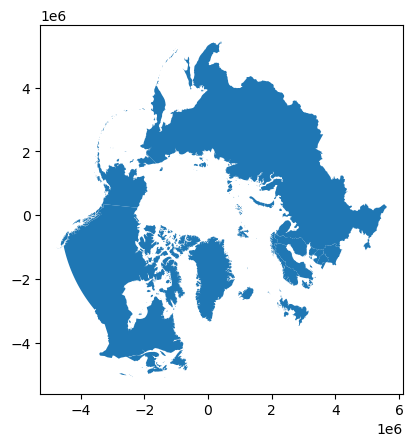

In [45]:
arctic_countries.plot()